# Business Case: Walmart - Confidence Interval and CLT

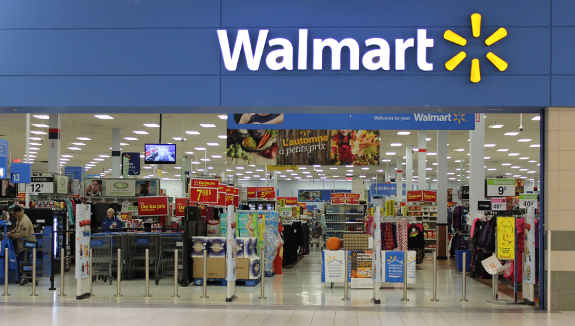

About Walmart
 
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

1. Defining Problem Statement and Analyzing basic metrics 

## Business Problem

- The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\Walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### Change the data types of - user_id, Occupation, Marital_Status, Product_Category

In [5]:
cols = ['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [6]:
df.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

## Non-Graphical Analysis

In [7]:
# describeing the numerical coulmn
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [8]:
# checking is there any null duplicated values are there or not
df.duplicated().sum()

0

# Statistical Summary

In [9]:
# describeing the all the columns 
df.describe(include= "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observation post modifying the categorical variable's data type:

- There are **5891** **unique users**, and **userid 1001680** being with the highest count.
- The customers belongs to **21 distinct occupation for the purchases being made with Occupation 4 being the highest.
- Marital status unmarried contribute more in terms of the count for the purchase.
- There are 20 unique product categories with 5 being the highest.

#### NULL VALUES / Missing Values

In [10]:
# checking is there any null values or missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### Unique Values

In [11]:
# checking is there any unique values 
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

1. We have transactions of 5891 users in this dataset.
2. We have 3631 type of products are on sale on the black friday.
3. We have customers that are belongs 7 age groups.
4. Our customers are distributed among 21 types of occupation.
5. We have customers from 3 categories of city.
6. Our customer's years of stay in their respective city is divided into 5 categories.
7. Our range of products is divided into 20 categories.

 ### Value counts

In [12]:
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
(df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df))*100

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

Observations:

1. 40% of the purchase done by aged 26-35 and 78% purchase are done by the customers aged between the age 18-45 (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. 75% of the purchase count are done by Male and 25% by Female
3. 60% Single, 40% Married contributes to the purchase count.
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. There are 20 product categories in total.
6. There are 20 different types of occupations in the city.

### Age

In [13]:
df_age=df.groupby(["User_ID"])["Age"].unique()
df_age.value_counts()

[26-35]    2053
[36-45]    1167
[18-25]    1069
[46-50]     531
[51-55]     481
[55+]       372
[0-17]      218
Name: Age, dtype: int64

In [14]:
(df_age.value_counts()/len(df_age))*100

[26-35]    34.849771
[36-45]    19.809879
[18-25]    18.146325
[46-50]     9.013750
[51-55]     8.164997
[55+]       6.314717
[0-17]      3.700560
Name: Age, dtype: float64

- We can see 35% of the user are aged 26-35.

- From the previous observation we saw 40% of the purchase are done by users aged 26-35. And, they are contributing 40% of total purchase count. So, we  can infer users aged 26-35 are more frequent coustomers.

#### City Category

In [15]:
df_city= df.groupby(["User_ID"])["City_Category"].unique()
(df_city.value_counts()/len(df_city))*100

[C]    53.284672
[B]    28.976405
[A]    17.738924
Name: City_Category, dtype: float64

- 53% of the users belongs to city Category C whereas 29% to category B and 18% belong to category A. combining from the previous observation category B purchase count is 42% and Category C purchase counts is 31%.

- We can clearly see category B are more actively purchasing inspite of the fact they are only 29% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.

### Gender

In [16]:
df_unique_gender=df.groupby(['Gender'])['User_ID'].nunique()
df_unique_gender

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [17]:
(df_unique_gender/df_unique_gender.sum())*100

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

In terms of **unique users** **28%** are **Female** and **72%** are **Male** as compared to the previous observation where **Female** users were **24.7%** and **Male** users were **75.3%**

#### Marital Status

In [18]:
df_marital= df.groupby(["User_ID"])["Marital_Status"].unique()
df_marital.value_counts()

[0]    3417
[1]    2474
Name: Marital_Status, dtype: int64

In [19]:
(df_marital.value_counts()/len(df_age))*100

[0]    58.003735
[1]    41.996265
Name: Marital_Status, dtype: float64

- We have **58%** of the **single users** and **42%** of **married users**.
- Combining with previous observation,**59%** of the **single users** contributes more as compared to **41%** of the **married users**

In [20]:
# Top 10 User with highest number of Purchase counts.
df_user_id_sum=df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)
df_user_id_sum

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

In [21]:
# Top 10 User with highest number of Purchase amounts.
df_user_id_count=df.groupby(['User_ID'])['Purchase'].count().nlargest(10)
df_user_id_count

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

- The users with high number of purchases contribute more to the purchase amount. 

-  we can see there are few users who are not in the list of top 10 purchase counts, but they are present in the top 10 purchase amounts, like User_ids 1004448 , 1003391 etc.. are top 10 in purchase amounts but not in purchase counts

- Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count.

In [22]:
df_Stay_In_Current_City_Years= df.groupby(["User_ID"])["Stay_In_Current_City_Years"].unique()
df_Stay_In_Current_City_Years.value_counts()

[1]     2086
[2]     1145
[3]      979
[4+]     909
[0]      772
Name: Stay_In_Current_City_Years, dtype: int64

### Bivariate

In [23]:
df_gender_purchase=pd.DataFrame(df.groupby(["Gender"])[["Purchase"]].sum())
df_gender_purchase["percent"]=(df_gender_purchase["Purchase"]/
                              df_gender_purchase["Purchase"].sum())*100
df_gender_purchase

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


- we can see male(72% of the population) contributes to more than 76%  of the total purchase amount where as female(28% of the population) contributes 23% of the total purchase amount.

In [24]:
df_Age_purchase=pd.DataFrame(df.groupby(["Age"])[["Purchase"]].sum())
df_Age_purchase["percent"]=(df_Age_purchase["Purchase"]/
                              df_Age_purchase["Purchase"].sum())*100
df_Age_purchase

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


Observation:
1. we can see the net purchase amount spread is simalr to the purchase count spread among the diffrent age groups.

In [25]:
df_Marital_Status_purchase=pd.DataFrame(df.groupby(["Marital_Status"])[["Purchase"]].sum())
df_Marital_Status_purchase["percent"]=(df_Marital_Status_purchase["Purchase"]/
                              df_Marital_Status_purchase["Purchase"].sum())*100
df_Marital_Status_purchase

,Purchase,percent
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


In [26]:
df_City_Category_purchase=pd.DataFrame(df.groupby(["City_Category"])[["Purchase"]].sum())
df_City_Category_purchase["percent"]=(df_City_Category_purchase["Purchase"]/
                              df_City_Category_purchase["Purchase"].sum())*100
df_City_Category_purchase

,Purchase,percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


Observations:
    
    1. City_category contribution to the total purchase amount is also similar to their contribution towards Purchase count. Still, combining with previous observation we can City_category C although has percentage purchase count of 31% but they contribute more in terms of purchase amount i.e. 32.65%. We can infer City category C purchase higher value products.

In [27]:
df_Stay_In_Current_City_Years=pd.DataFrame(df.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())

df_Stay_In_Current_City_Years['percent'] = (df_Stay_In_Current_City_Years['Purchase'] / 
                  df_Stay_In_Current_City_Years['Purchase'].sum()) * 100
df_Stay_In_Current_City_Years

,Purchase,percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


In [28]:
df_Product_Category_purchase=pd.DataFrame(df.groupby(["Product_Category"])[["Purchase"]].sum())
df_Product_Category_purchase["percent"]=(df_Product_Category_purchase["Purchase"]/
                              df_Product_Category_purchase["Purchase"].sum())*100
df_Product_Category_purchase.sort_values("Purchase",ascending=False)

,Purchase,percent
Product_Category,,
1,1910013754,37.482024
5,941835229,18.482532
8,854318799,16.765114
6,324150302,6.361111
2,268516186,5.269350
3,204084713,4.004949
16,145120612,2.847840
11,113791115,2.233032
10,100837301,1.978827


In [29]:
round(pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")*100,2)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,1.72,18.64,49.92,18.02,5.15,4.13,2.42
B,2.35,18.71,39.62,20.59,8.83,7.67,2.23
C,4.16,16.87,31.70,20.91,10.33,8.56,7.46
All,2.75,18.12,39.92,20.00,8.31,7.00,3.91


In [30]:
round(pd.crosstab(index=df["City_Category"],columns=df["Product_Category"],margins=True,normalize="index")*100,2)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,23.75,4.16,3.35,2.06,28.58,3.73,0.83,21.78,0.07,0.90,4.47,0.72,1.09,0.33,1.16,1.93,0.08,0.51,0.18,0.32
B,25.20,4.52,3.71,2.26,27.74,3.69,0.69,20.57,0.08,0.89,4.54,0.72,0.98,0.27,1.14,1.75,0.12,0.60,0.20,0.33
C,27.48,4.25,3.90,2.03,26.05,3.76,0.52,19.98,0.07,1.01,4.21,0.71,0.97,0.24,1.13,1.72,0.11,0.57,0.51,0.78
All,25.52,4.34,3.67,2.14,27.44,3.72,0.68,20.71,0.07,0.93,4.42,0.72,1.01,0.28,1.14,1.79,0.11,0.57,0.29,0.46


In [31]:
round(pd.crosstab(index=df["City_Category"],columns=df["Gender"],margins=True,normalize="index")*100,2)

Gender,F,M
City_Category,,
A,24.17,75.83
B,25.00,75.00
C,24.72,75.28
All,24.69,75.31


In [32]:
round(pd.crosstab(index=df["City_Category"],columns=df["Marital_Status"],margins=True,normalize="index")*100,2)

Marital_Status,0,1
City_Category,,
A,61.72,38.28
B,59.14,40.86
C,56.57,43.43
All,59.03,40.97


## Outlier

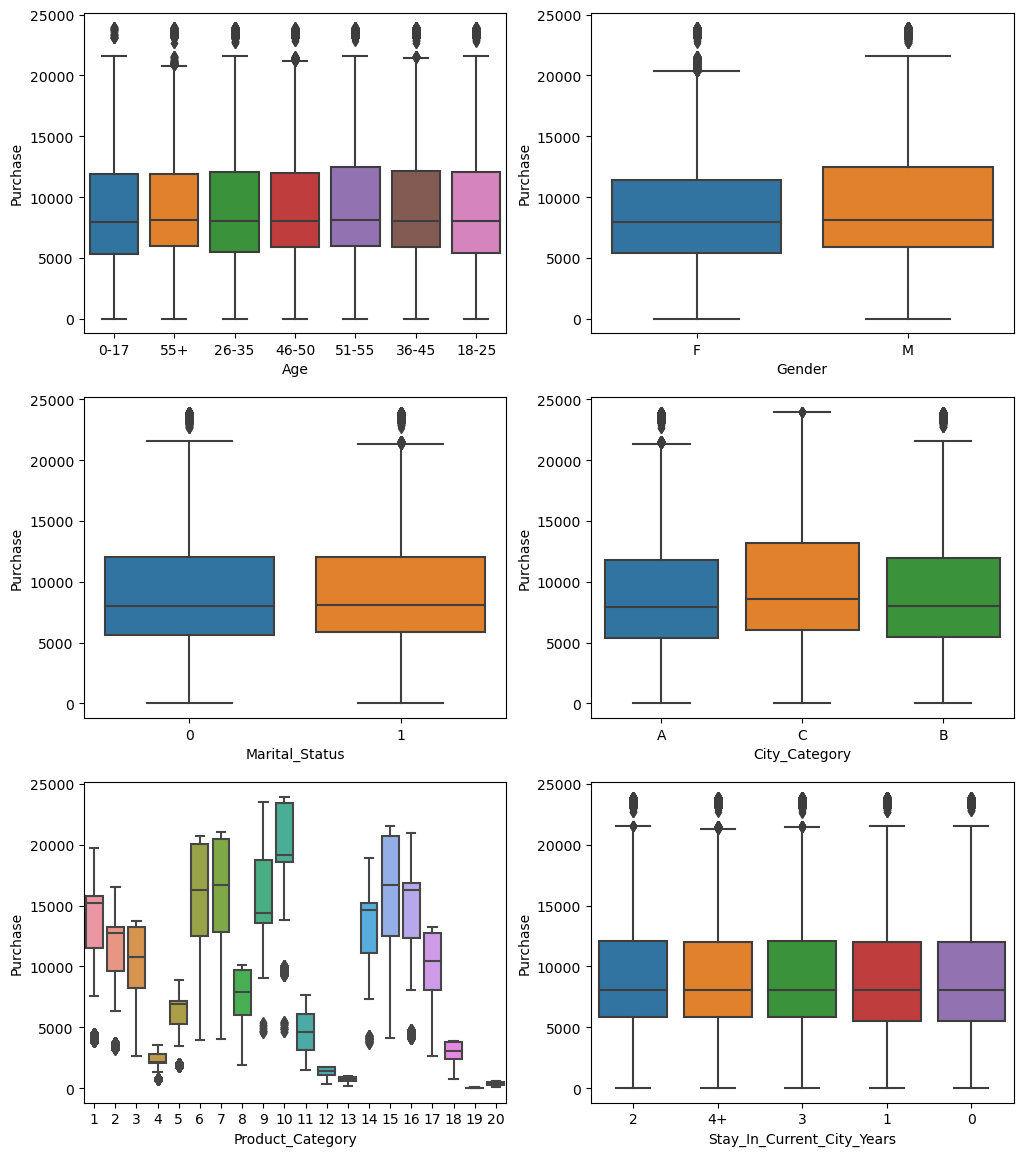

In [33]:
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df,x="Age",y= "Purchase",ax=axis[0,0])
sns.boxplot(data=df,x="Gender",y= "Purchase",ax=axis[0,1])
sns.boxplot(data=df,x="Marital_Status",y= "Purchase",ax=axis[1,0])
sns.boxplot(data=df,x="City_Category",y= "Purchase",ax=axis[1,1])
sns.boxplot(data=df,x="Product_Category",y= "Purchase",ax=axis[2,0])
sns.boxplot(data=df,x="Stay_In_Current_City_Years",y= "Purchase",ax=axis[2,1])
plt.show()

In [53]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1 
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [54]:
outliers = find_outliers_IQR(df["Purchase"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


# Visual Analysis - Univariate 

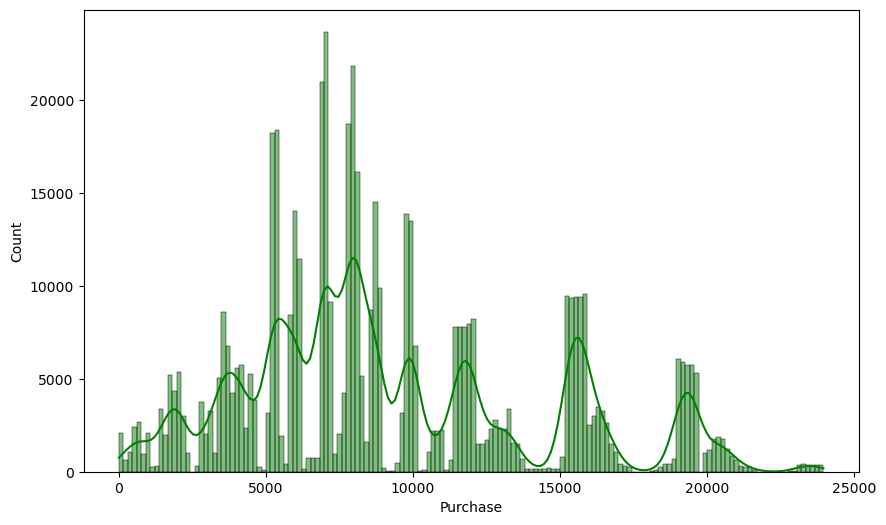

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Purchase", kde=True ,color= 'g')
plt.show()

- We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

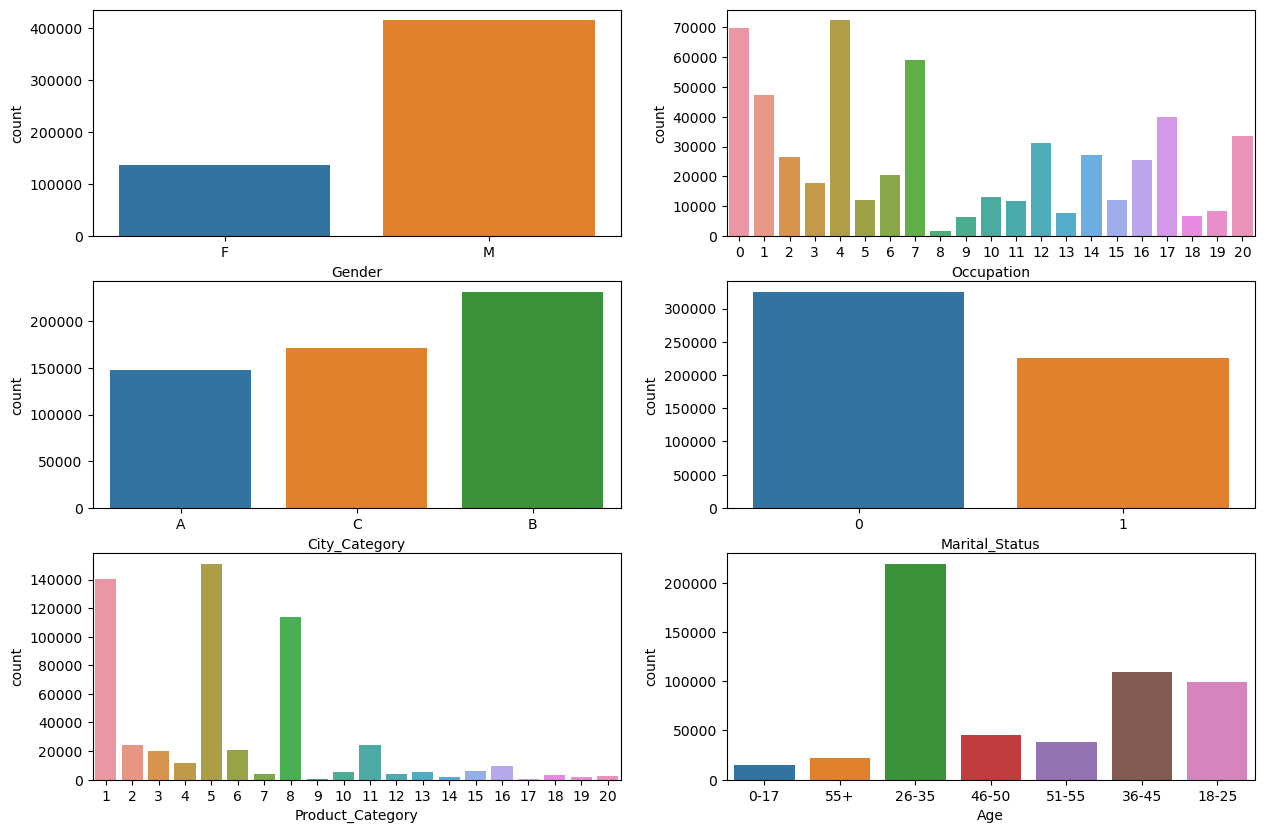

In [35]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
sns.countplot(data=df, x='Product_Category',ax=axs[2,0])
sns.countplot(data=df, x='Age',ax=axs[2,1])
plt.show()

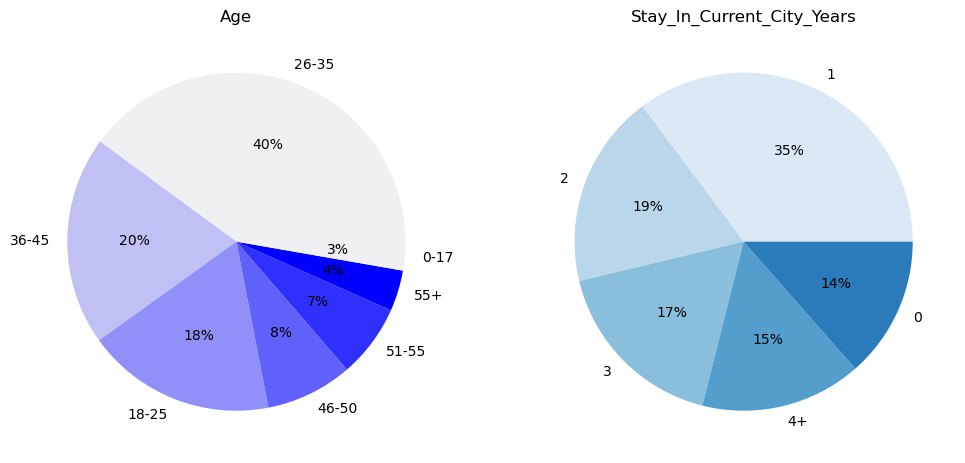

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('light:b')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('Blues')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")

plt.show()

- **Gender**
1. We have more number of male customers, and they are contributing more in the sales.
- **occupation**
1. We see that Customer Occupation **0,4,7** contributes more and Customer Occupation **8** contributes very less
- **City_ccategory**
1.  city category **B** contributes more on **black friday sales**
- **Marital_status**
1. On black friday sale the Customers who are single contributing more then the Customer who are married
- **Product_Category**
1.  product Category 1,5,8 are Purchased more on black friday sale 
- **Age**
1. Age groups **26-35(40%)** and **36-45(20%)** are buying more on black firday sale


###  Bivariate

#### Gender

<Axes: xlabel='Product_Category', ylabel='count'>

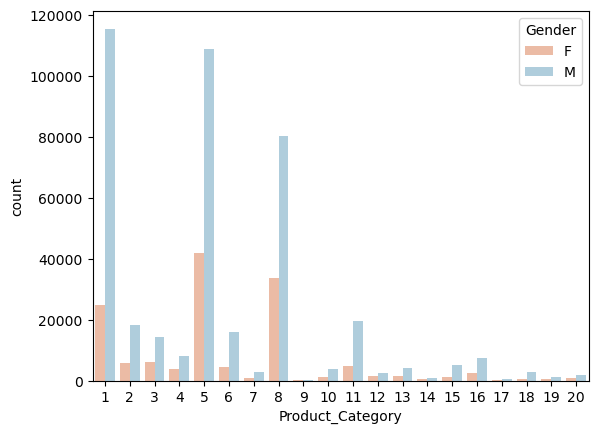

In [37]:
sns.countplot(df,x="Product_Category",hue = "Gender",palette="RdBu")

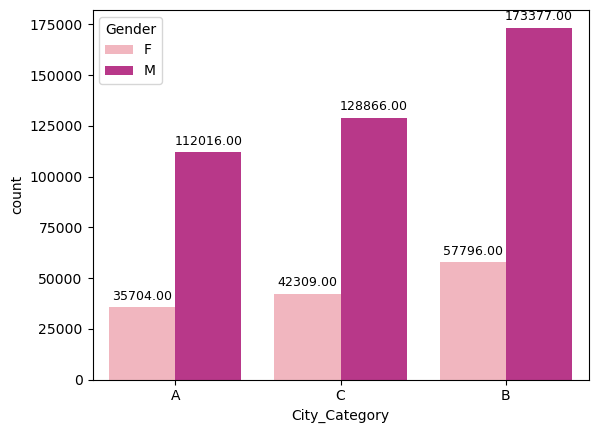

In [38]:
City_Category=sns.countplot(df,x="City_Category",hue = "Gender",palette="RdPu")
for bar in City_Category.patches:
    City_Category.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

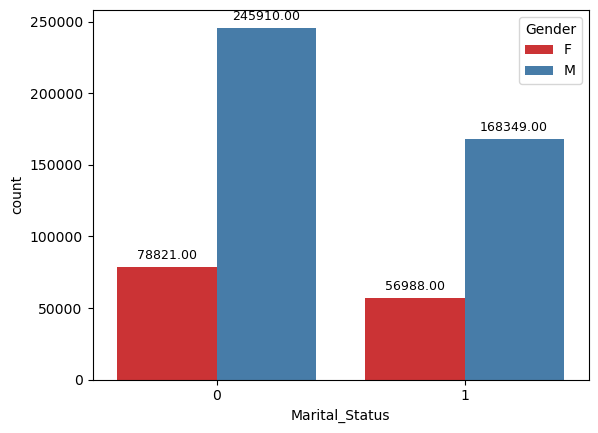

In [39]:
MaritalStatus= sns.countplot(df,x="Marital_Status",hue = "Gender",palette="Set1")
for bar in MaritalStatus.patches:
    MaritalStatus.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=9, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

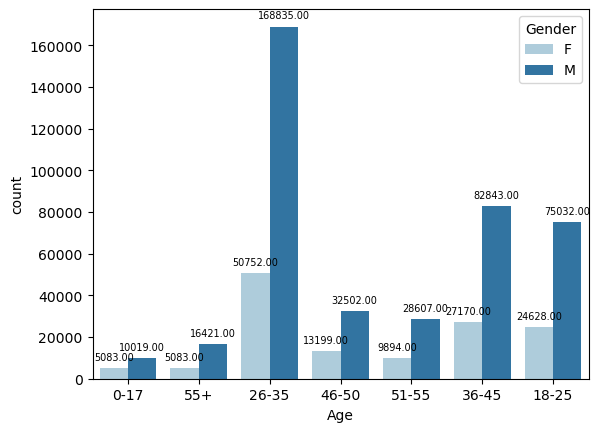

In [40]:
Age=sns.countplot(df,x="Age",hue = "Gender",palette='Paired')
for bar in Age.patches:
    Age.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=7, xytext=(0, 8),
                       textcoords='offset points')
plt.show()

<Axes: xlabel='Purchase', ylabel='Count'>

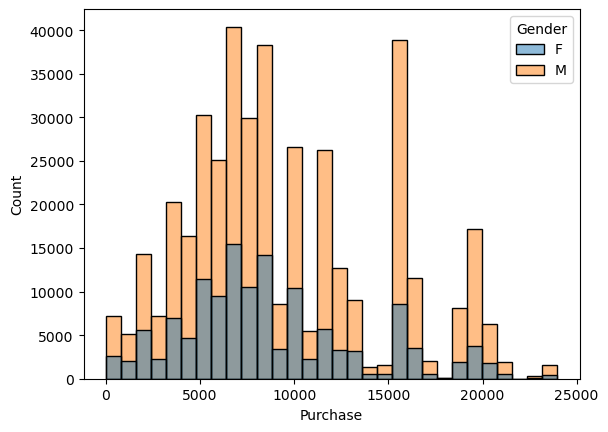

In [41]:
sns.histplot(df,x= "Purchase",hue="Gender",bins=30)

### Multivariate Analysis

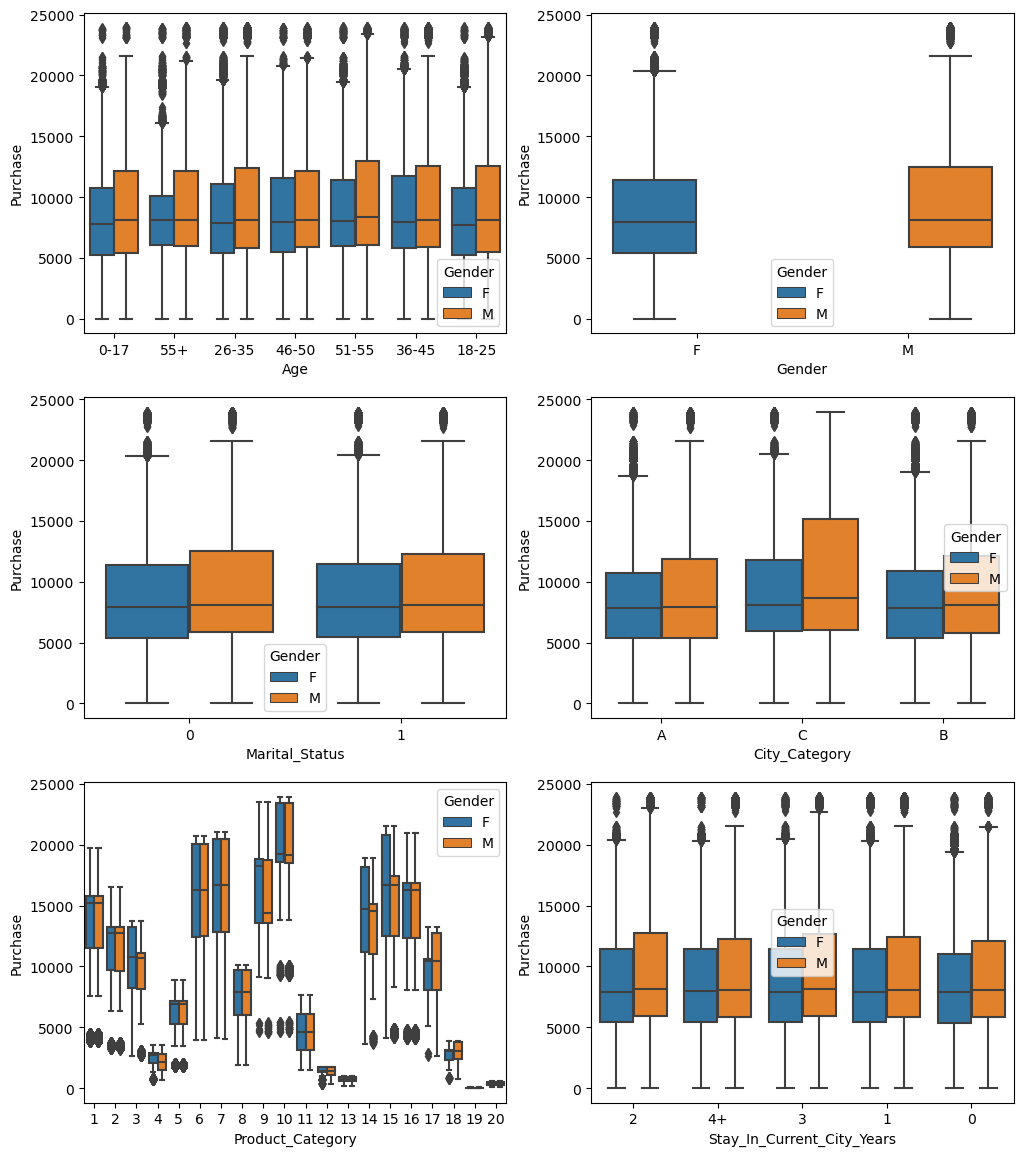

In [42]:
fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df,x="Age",y= "Purchase",hue="Gender",ax=axis[0,0])
sns.boxplot(data=df,x="Gender",y= "Purchase",hue="Gender",ax=axis[0,1])
sns.boxplot(data=df,x="Marital_Status",y= "Purchase",hue="Gender",ax=axis[1,0])
sns.boxplot(data=df,x="City_Category",y= "Purchase",hue="Gender",ax=axis[1,1])
sns.boxplot(data=df,x="Product_Category",y= "Purchase",hue="Gender",ax=axis[2,0])
sns.boxplot(data=df,x="Stay_In_Current_City_Years",y= "Purchase",hue="Gender",ax=axis[2,1])
plt.show()

In [43]:
df.groupby(["Age"])["Purchase"].describe().T

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
count,15102.000000,99660.000000,219587.000000,110013.000000,45701.000000,38501.000000,21504.000000
mean,8933.464640,9169.663606,9252.690633,9331.350695,9208.625697,9534.808031,9336.280459
std,5111.114046,5034.321997,5010.527303,5022.923879,4967.216367,5087.368080,5011.493996
min,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
25%,5328.000000,5415.000000,5475.000000,5876.000000,5888.000000,6017.000000,6018.000000
50%,7986.000000,8027.000000,8030.000000,8061.000000,8036.000000,8130.000000,8105.500000
75%,11874.000000,12028.000000,12047.000000,12107.000000,11997.000000,12462.000000,11932.000000
max,23955.000000,23958.000000,23961.000000,23960.000000,23960.000000,23960.000000,23960.000000


In [44]:
df.groupby(["Gender"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [45]:
df.groupby(["Marital_Status"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [46]:
df.groupby(["City_Category"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [47]:
df.groupby(["Product_Category"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Product_Category,,,,,,,,
1,140378.0,13606.218596,4298.834894,3790.0,11546.00,15245.0,15812.00,19708.0
2,23864.0,11251.935384,3570.642713,3176.0,9645.75,12728.5,13212.00,16504.0
3,20213.0,10096.705734,2824.626957,2638.0,8198.00,10742.0,13211.00,13717.0
4,11753.0,2329.659491,812.540292,684.0,2058.00,2175.0,2837.00,3556.0
5,150933.0,6240.088178,1909.091687,1713.0,5242.00,6912.0,7156.00,8907.0
6,20466.0,15838.478550,4011.233690,3981.0,12505.00,16312.0,20051.00,20690.0
7,3721.0,16365.689600,4174.554105,4061.0,12848.00,16700.0,20486.00,21080.0
8,113925.0,7498.958078,2013.015062,1939.0,6036.00,7905.0,9722.00,10082.0
9,410.0,15537.375610,5330.847116,4528.0,13583.50,14388.5,18764.00,23531.0


In [48]:
df.groupby(["Stay_In_Current_City_Years"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Stay_In_Current_City_Years,,,,,,,,
0,74398.0,9180.075123,4990.479940,12.0,5480.0,8025.0,11990.0,23960.0
1,193821.0,9250.145923,5027.476933,12.0,5500.0,8041.0,12042.0,23961.0
2,101838.0,9320.429810,5044.588224,12.0,5846.0,8072.0,12117.0,23961.0
3,95285.0,9286.904119,5020.343541,12.0,5832.0,8047.0,12075.0,23961.0
4+,84726.0,9275.598872,5017.627594,12.0,5844.0,8052.0,12038.0,23958.0


In [49]:
df.groupby(["Occupation"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
0,69638.0,9124.428588,4971.757402,12.0,5445.00,8001.0,11957.00,23961.0
1,47426.0,8953.193270,4838.482159,12.0,5825.00,7966.0,11702.75,23960.0
2,26588.0,8952.481683,4939.418663,12.0,5419.00,7952.0,11718.00,23955.0
3,17650.0,9178.593088,5000.942719,12.0,5478.00,8008.0,11961.00,23914.0
4,72308.0,9213.980251,5043.674855,12.0,5441.75,8043.0,12034.00,23961.0
5,12177.0,9333.149298,5025.616603,12.0,5452.00,8080.0,12091.00,23924.0
6,20355.0,9256.535691,4989.216005,12.0,5888.00,8050.0,11971.50,23951.0
7,59133.0,9425.728223,5086.097089,12.0,5878.00,8069.0,12486.00,23948.0
8,1546.0,9532.592497,4916.641374,14.0,5961.75,8419.5,12607.00,23869.0


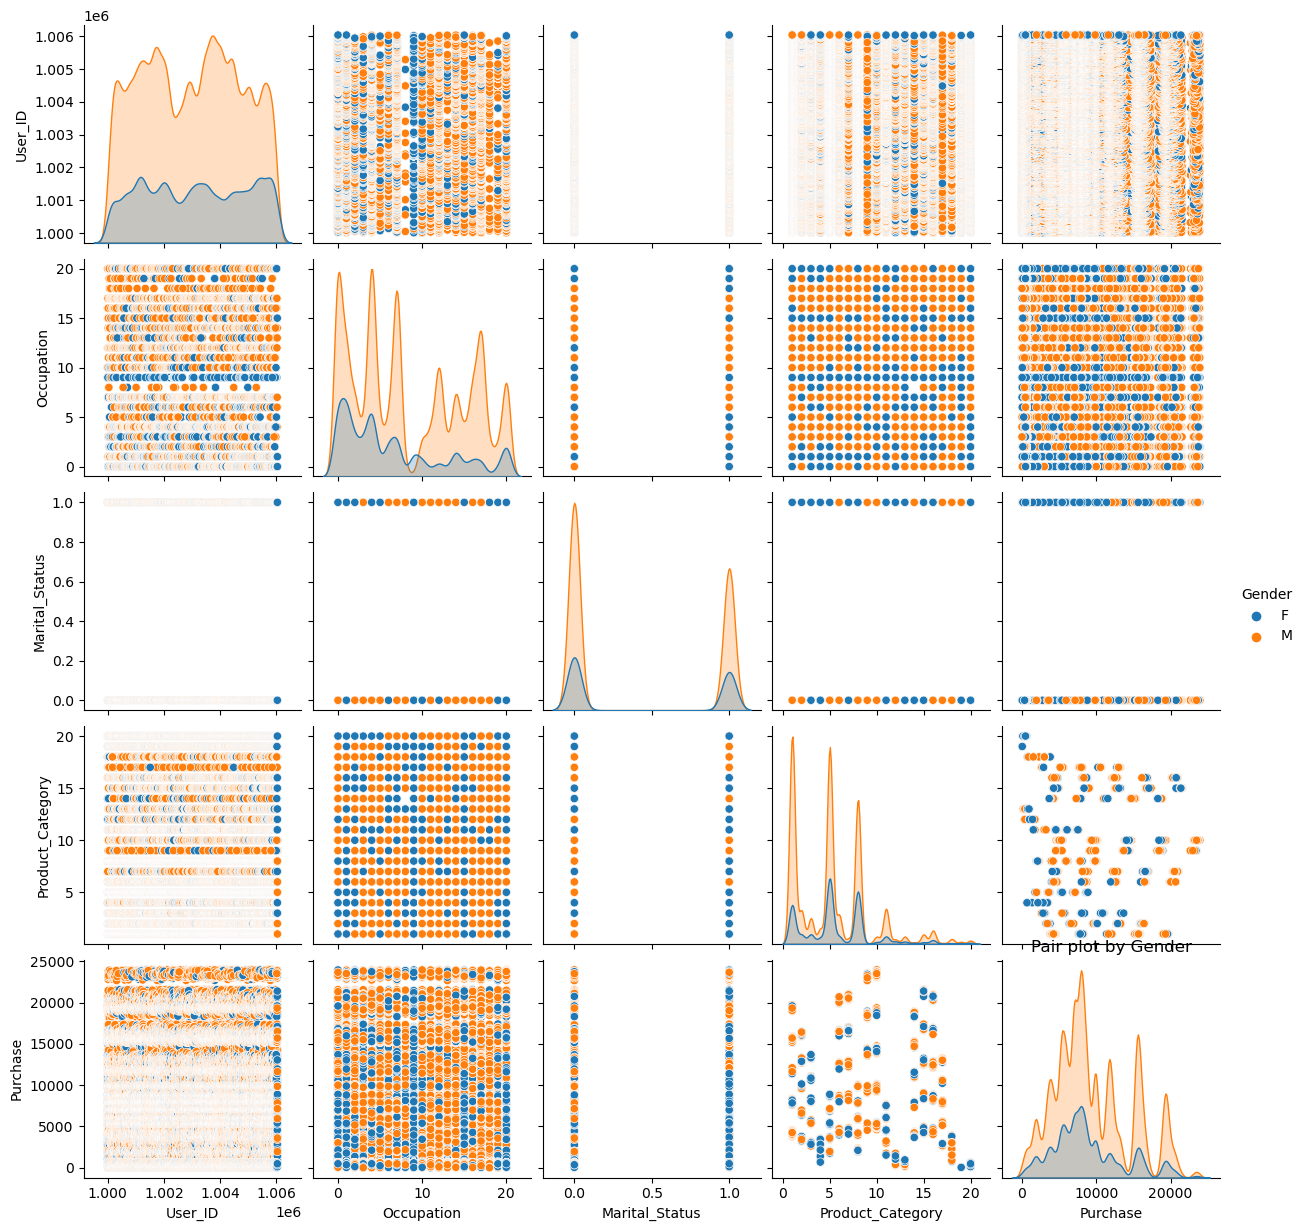

In [50]:
sns.pairplot(df,hue="Gender",diag_kind="kde")
plt.title("Pair plot by Gender")
plt.show()

#### Average amount spend per Customer for male and Female

In [55]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [56]:
avg = amt_df['Gender'].value_counts()
avg

M    4225
F    1666
Name: Gender, dtype: int64

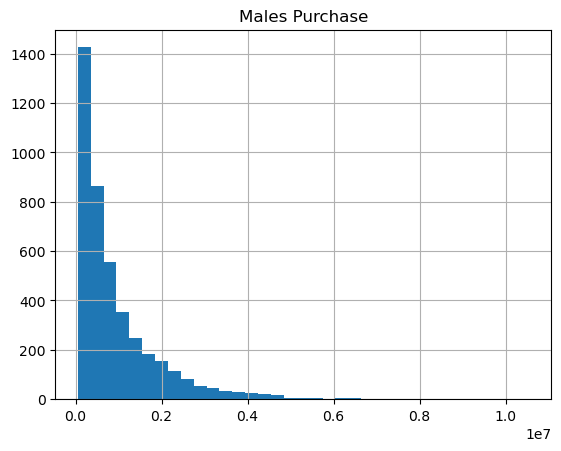

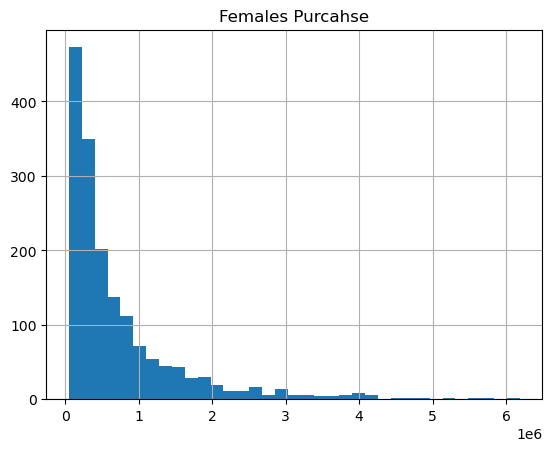

In [57]:
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.title('Males Purchase')
plt.show()

amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.title('Females Purcahse')
plt.show()

In [58]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [59]:
male_df = amt_df[amt_df['Gender']=='M']
male_df['Purchase'].sum()

3909580100

In [60]:
male_df = amt_df[amt_df['Gender']=='M']
male_df['Purchase'].count()

4225

In [61]:
female_df = amt_df[amt_df['Gender']=='F']
female_df['Purchase'].count()

1666

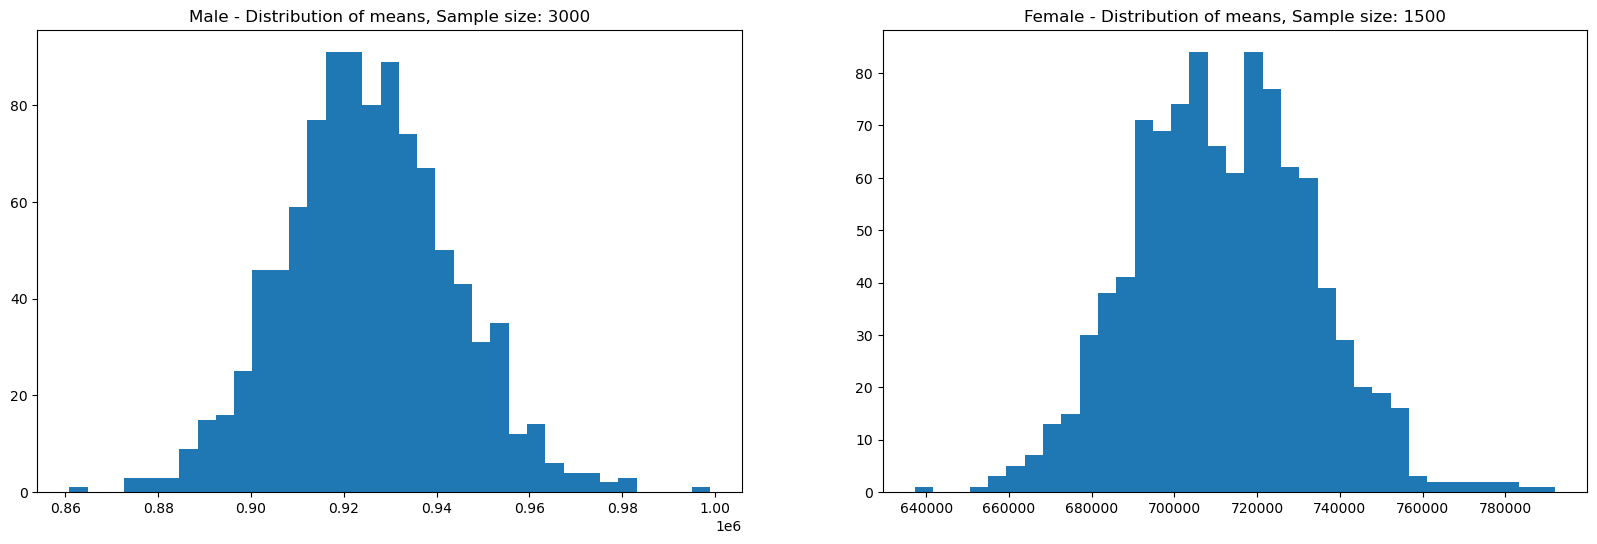

In [62]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [63]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925368.67
Population mean - Mean of sample means of amount spend for Female: 711766.88

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [64]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


Now we can infer about the population that, 95% of the times:
    
-  Average amount spend by male customer will lie in between: (895617.83, 955070.97)
-  Average amount spend by female customer will lie in between: (673254.77, 750794.02)

### Calculating the average amount spent by Married Vs Single

4. Results when the same activity is performed for Married vs Unmarried

In [65]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [66]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [67]:
amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

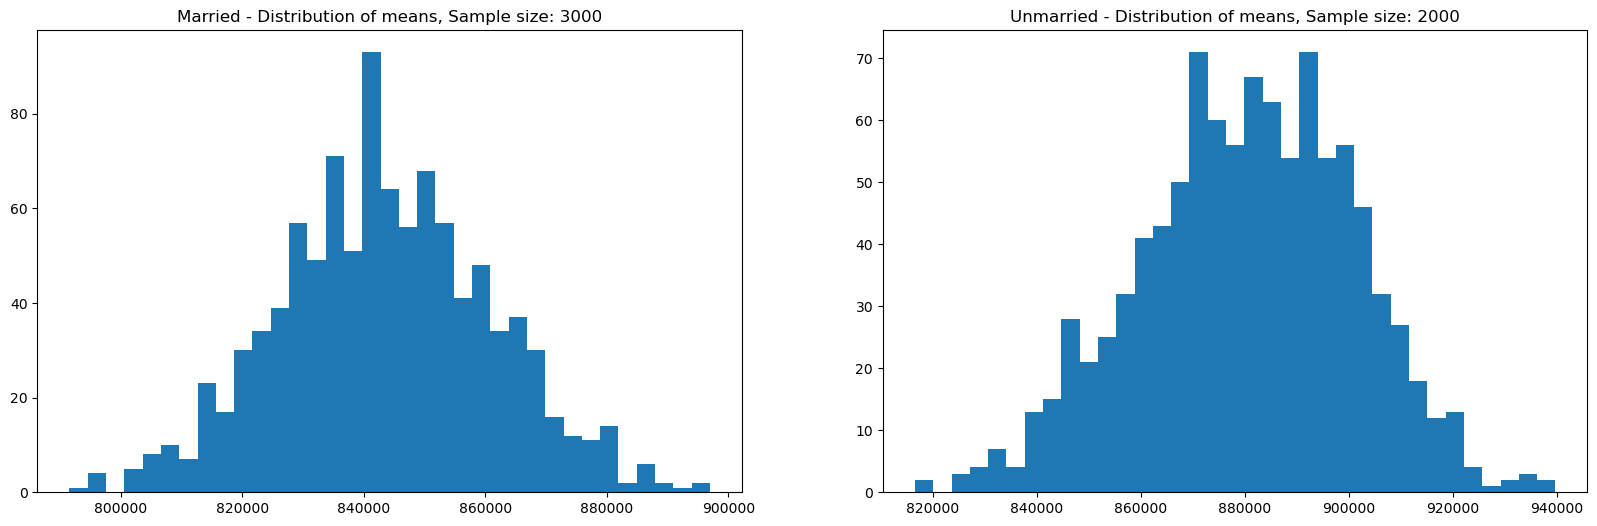

Population mean - Mean of sample means of amount spend for Married: 843635.55
Population mean - Mean of sample means of amount spend for Unmarried: 880374.21
Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25
Unmarried confidence interval of means: (848741.18, 912410.38)


In [68]:
amt_df
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df 
amt_df['Marital_Status'].value_counts()
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []
for i in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size,replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size,replace=True)['Purchase'].mean()
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
 
 
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")
                  
plt.show()
                  
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))
      
print("Married - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(),amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))
for val in ["Married", "Unmarried"]:new_val = 1 if val == "Married" else 0
new_df = amt_df[amt_df['Marital_Status']==new_val] 
 
margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
sample_mean = new_df['Purchase'].mean()
lower_lim = sample_mean - margin_of_error_clt 
upper_lim = sample_mean + margin_of_error_clt
    
print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

In [69]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


Now we can infer about the population that, 95% of the times:

- Average amount spend by Married  customer will lie in between: (806668.83, 880384.76)
- Average amount spend by Unmarried  customer will lie in between: (848741.18, 912410.38)

### Calculating the average amount spent by Age.

Results when the same activity is performed for Age

In [70]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()

amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [71]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [72]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [73]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


Insights¶
80% of the users are between the age 18-50 ,40%: 26-35, 18%: 18-25, 20%: 36-45

75% of the users are Male and 25% are Female.

60% Single, 40% Married.

35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years.

There are Total of 20 product categories.

There are 20 differnent types of occupations in the city.

Most of the users are Male

There are 20 different types of Occupation and Product_Category

More users belong to B City_Category

More users are Single as compare to Married

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

Average amount spend by Male customers: 925344.40

Average amount spend by Female customers: 712024.39

Confidence Interval by Gender

Now using the Central Limit Theorem for the population:

Average amount spend by male customers is 9,26,341.86
Average amount spend by female customers is 7,11,704.09 Now we can infer about the population that, 95% of the times:
Average amount spend by male customer will lie in between: (895617.83, 955070.97)
Average amount spend by female customer will lie in between: (673254.77, 750794.02)
Confidence Interval by Marital_Status

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)
Confidence Interval by Age

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17
Recommendations
Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45.

Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.